<a href="https://colab.research.google.com/github/iamhimanshusharma/Assignment/blob/main/NS_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:17
🔁 Restarting kernel...


In [ ]:
!mamba install -q graph-tool

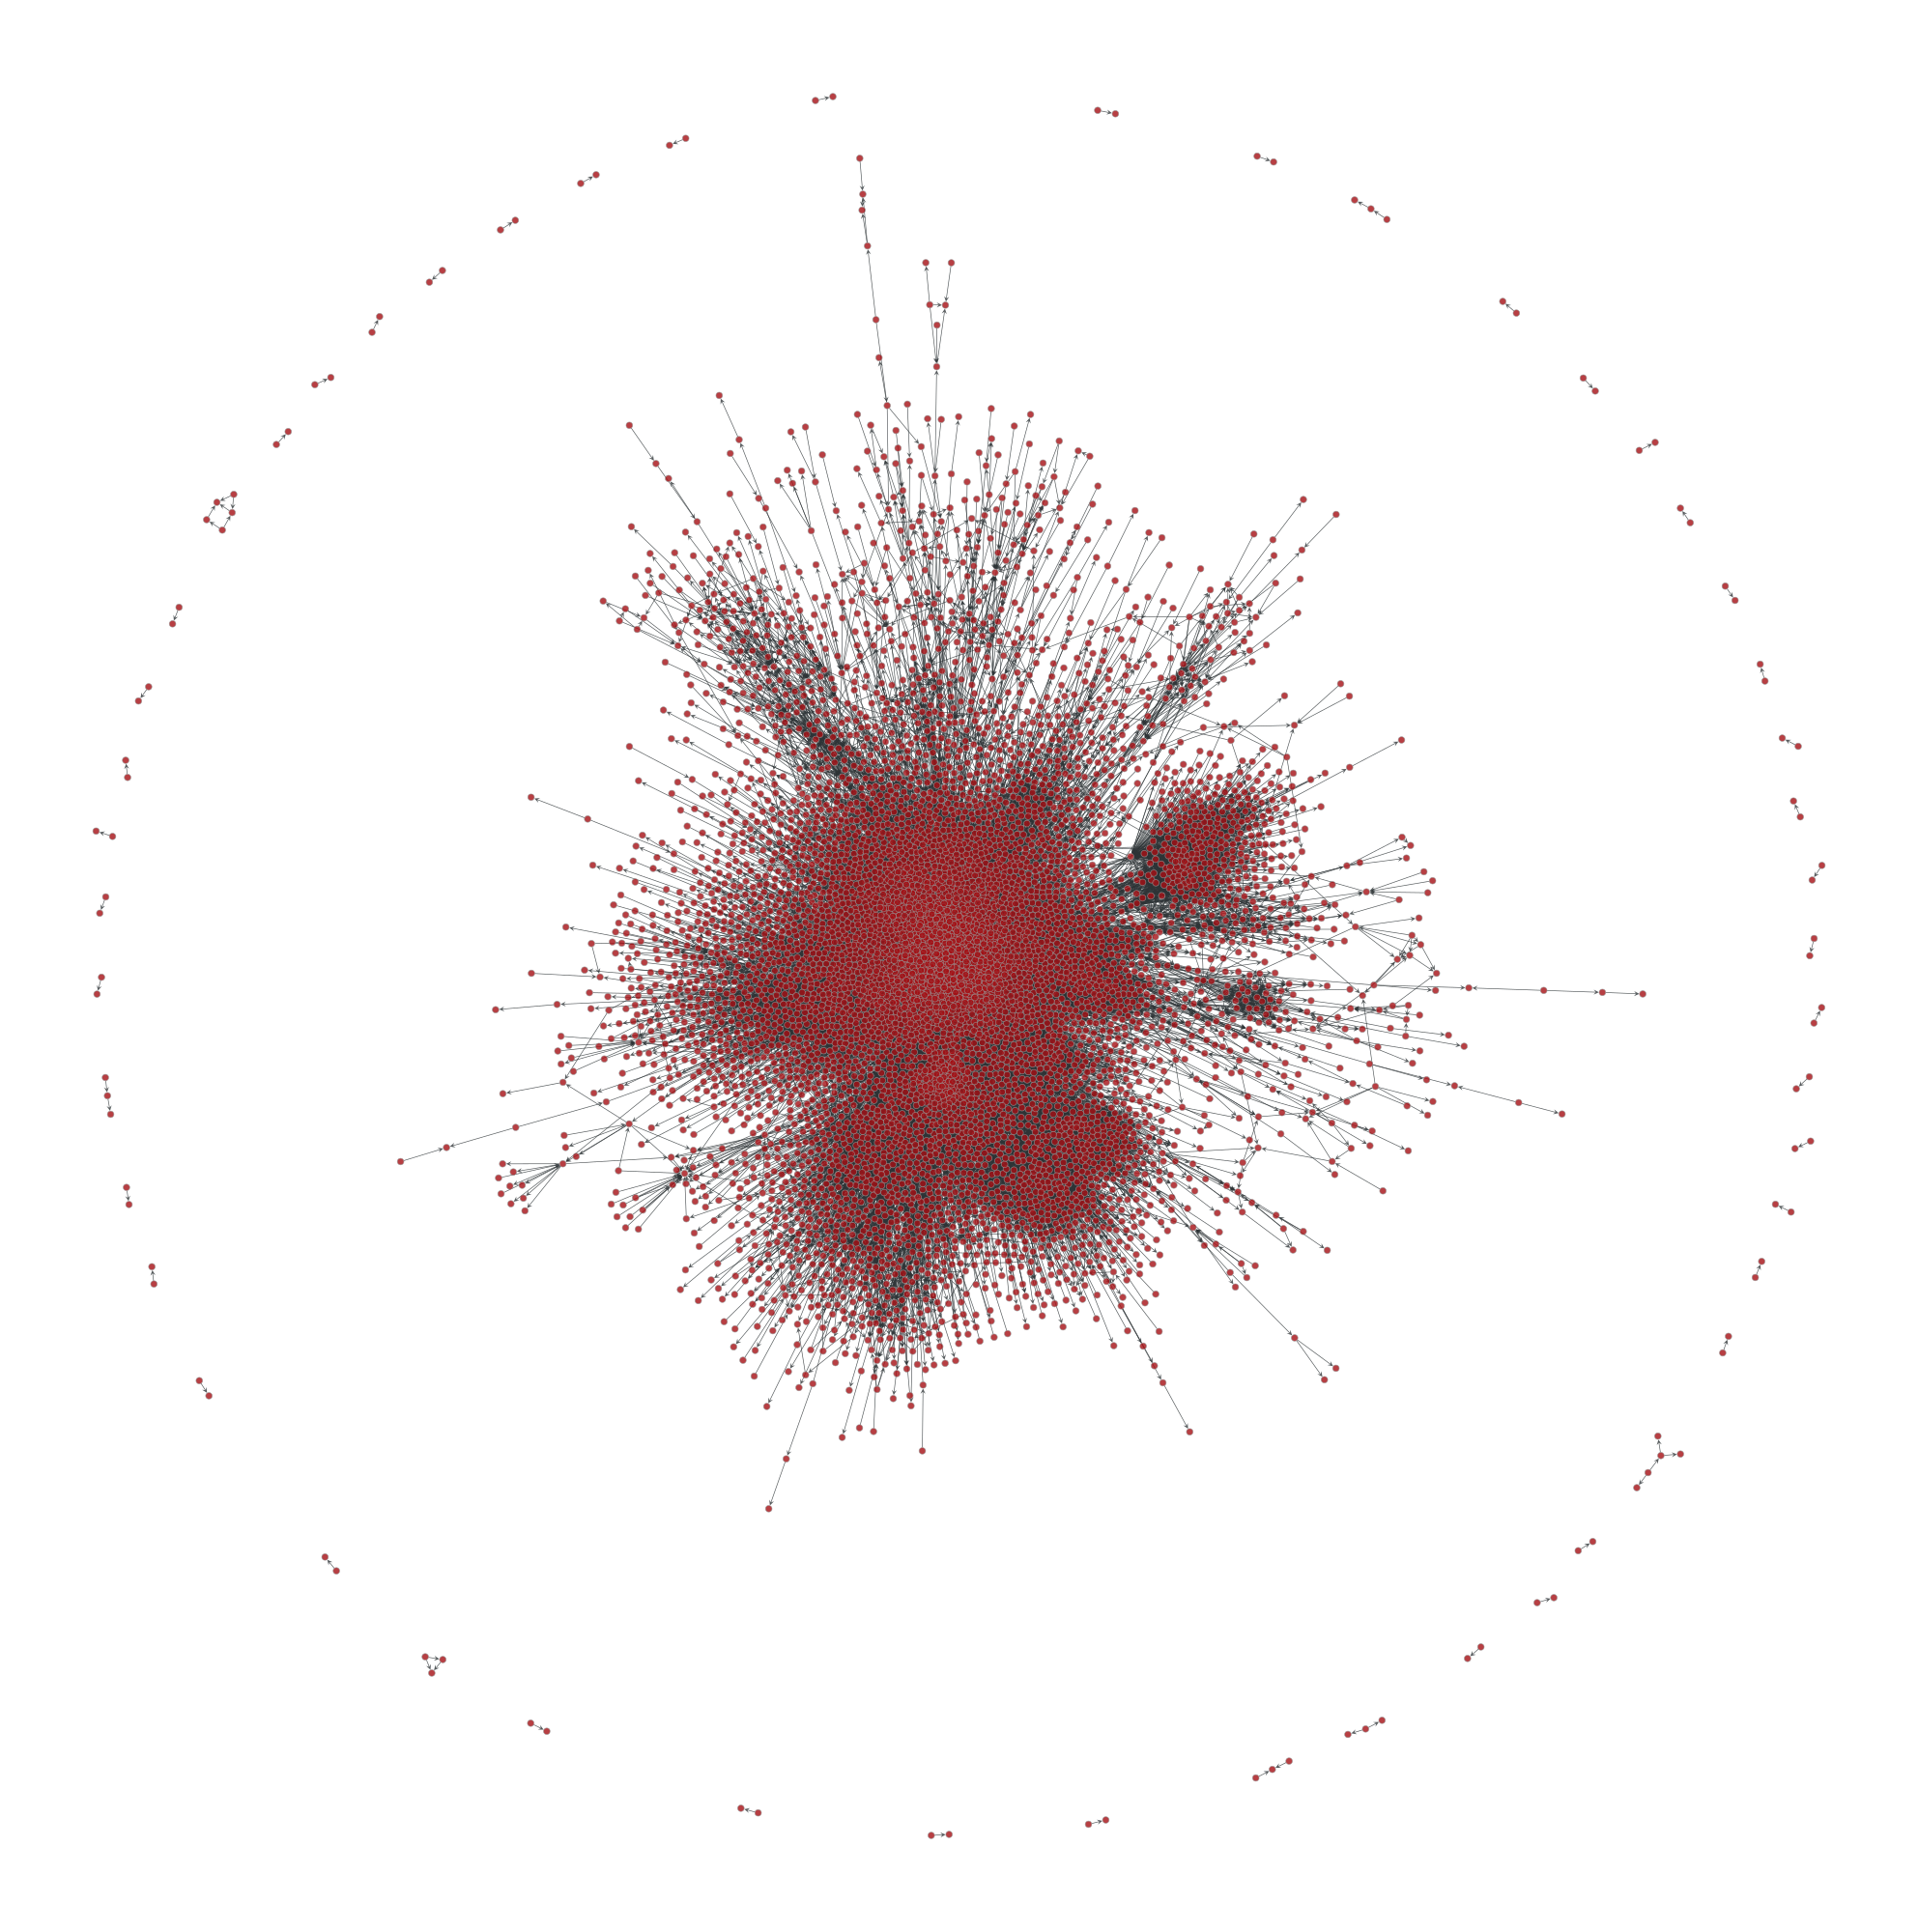

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7d4d5f3c6590, at 0x7d4d66087150>

In [ ]:
from graph_tool.all import Graph
import csv

# Step 1: Initialize graph
g = Graph(directed=True)

# Create a vertex map: {spotify_id: vertex}
vertex_map = {}

# Step 2: Load edges manually from CSV
with open("edges_1.csv", "r") as f:
    reader = csv.reader(f)
    next(reader)  # skip header
    for source_id, target_id in reader:
        if source_id not in vertex_map:
            vertex_map[source_id] = g.add_vertex()
        if target_id not in vertex_map:
            vertex_map[target_id] = g.add_vertex()
        g.add_edge(vertex_map[source_id], vertex_map[target_id])


# Step 4: Create vertex properties
name_prop = g.new_vertex_property("string")
followers_prop = g.new_vertex_property("float")
popularity_prop = g.new_vertex_property("int")

# Step 5: Assign properties using spotify_id
with open("nodes_1.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        node_id = row["spotify_id"]
        if node_id in vertex_map:
            v = vertex_map[node_id]
            name_prop[v] = row["name"]
            followers = row["followers"]
            popularity = row["popularity"]

            followers_prop[v] = float(followers) if followers.strip() else 0.0
            popularity_prop[v] = int(popularity) if popularity.strip() else 0


# Step 6: Attach to graph
g.vp["name"] = name_prop
g.vp["followers"] = followers_prop
g.vp["popularity"] = popularity_prop


from graph_tool.draw import graph_draw

graph_draw(
    g,
    vertex_font_size=10,
    output_size=(1000, 1000),
    edge_arrow_size=0.4
)